# Benchmarcks and plots of SVM PPO optim envs

In [9]:
import numpy as np
import os
import glob
import pickle

import matplotlib
import matplotlib.pyplot as plt
import itertools
from matplotlib import cm
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%load_ext autoreload
%autoreload 2
from IPython import get_ipython

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## All the data stored in the run folder file
run = 'run_10/'
name_dir = 'runs_optim_envs/'+run

## print info of this run
info = pickle.load(open(name_dir+'info.p', 'rb'))
for k in info.keys():
    print(k, ' : ', info[k])

alg  :  PPO
env  :  svmEnv-v2
basis_size  :  200
lambda_gae  :  0.95
gamma  :  0.99
clip  :  0.2
lr_critic  :  0.0003
lr_actor  :  0.0003
num_update  :  10
add_noise_every  :  1


In [11]:
## Example of data stored and number of episodes
rew_files = name_dir+'rew*'
num_ep = len(glob.glob(rew_files))
print('The number of episodes is then:', num_ep)

The number of episodes is then: 86


The max score is at episode 43 and is equal to 974.8643141639977
The min score is at episode 61 and is equal to 970.425728419362


Text(0.5, 0, 'Episode \\#')

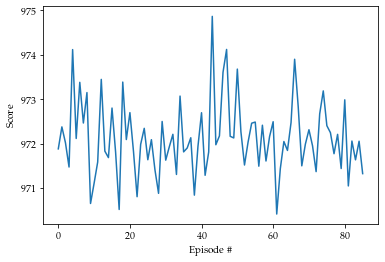

In [12]:
## Score data analysis
scores = np.zeros(num_ep)
for i in range(num_ep):
    rew = pickle.load(open(name_dir+f'rew_{i}.p', 'rb'))
    scores[i] = np.mean([np.sum(ep_rews) for ep_rews in rew])
    
## Max and min
index_max = np.argmax(scores)
index_min = np.argmin(scores)
print(f'The max score is at episode {index_max} and is equal to {scores[index_max]}')
print(f'The min score is at episode {index_min} and is equal to {scores[index_min]}')
    
## Plot scores    
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode \#')

The min en (BEST CASE) is at episode 74 and is equal to -0.1503514051437378
tensor([[ 0.0000, -0.1426, -0.1455, -0.1480, -0.1477, -0.1457, -0.1411, -0.1493,
         -0.1438, -0.1479, -0.1485, -0.1481, -0.1322, -0.1473, -0.1443, -0.1459,
         -0.1441, -0.1485, -0.1450, -0.1495, -0.1338, -0.1414, -0.1494, -0.1488,
         -0.1497, -0.1312, -0.1448, -0.1489, -0.1501, -0.1486, -0.1410, -0.1492,
         -0.1500, -0.1491, -0.1503, -0.1441, -0.1481, -0.1405, -0.1496, -0.1466,
         -0.1441, -0.1500, -0.1493, -0.1494, -0.1487, -0.1402, -0.1495, -0.1447,
         -0.1487, -0.1461, -0.1377, -0.1445, -0.1479, -0.1456, -0.1495, -0.1497,
         -0.1486, -0.1497, -0.1384, -0.1435, -0.1434, -0.1500, -0.1493, -0.1442,
         -0.1500, -0.1484, -0.1485, -0.1492, -0.1502, -0.1436, -0.1473, -0.1499,
         -0.1462, -0.1425, -0.1467, -0.1491, -0.1346, -0.1491, -0.1449, -0.1395,
         -0.1474, -0.1485, -0.1446, -0.1498, -0.1432, -0.1489, -0.1479, -0.1441,
         -0.1500, -0.1488, -0.146

Text(0.5, 0, 'Episode \\#')

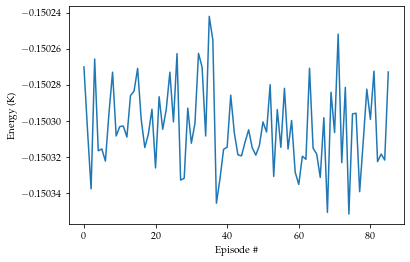

In [13]:
## Energies data analysis
en_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    en_ep = pickle.load(open(name_dir+f'en_{i}.p', 'rb'))
    en_per_ep[i] = np.mean([min(en_traj) for en_traj in en_ep])
    
## Max and min
index_min = np.argmin(en_per_ep)
index_max = np.argmax(en_per_ep)
print(f'The min en (BEST CASE) is at episode {index_min} and is equal to {en_per_ep[index_min]}')
print(pickle.load(open(name_dir+f'en_{index_min}.p', 'rb')))
print(f'The max en (WORST CASE) is at episode {index_max} and is equal to {en_per_ep[index_max]}')
print(pickle.load(open(name_dir+f'en_{index_max}.p', 'rb')))

## Plot energies over episode    
plt.plot(np.arange(len(en_per_ep)), en_per_ep)
plt.ylabel('Energy (K)')
plt.xlabel('Episode \#')

The biggest pri dim (BEST CASE) is at episode 16 and is equal to 149.4
[[139 134 137 144 141 133 134 140 146 132 138 154 140 147 145 130 138 143
  140 136 131 131 147 142 145 137 130 136 141 141 143 135 144 143 142 143
  138 137 142 145 139 141 134 137 139 136 144 140 134 129 149 141 143 139
  141 139 133 139 135 146 146 136 139 141 136 142 145 145 140 129 144 134
  142 140 135 142 141 137 145 136 137 140 136 135 147 137 134 131 142 138
  141 144 139 134 131 144 148 134 147 139]
 [142 144 143 131 141 132 142 139 148 134 141 144 139 145 141 142 142 135
  143 143 140 140 138 128 145 144 136 148 146 139 139 141 140 138 137 137
  139 129 141 139 140 140 144 137 134 139 136 137 129 131 148 143 141 138
  138 130 138 142 138 135 140 146 138 143 137 147 149 139 143 137 140 142
  140 141 141 130 138 134 140 145 142 137 144 143 136 146 132 138 141 138
  136 131 139 136 137 134 135 132 131 137]
 [142 143 139 145 138 142 133 140 143 140 135 138 146 140 134 141 134 142
  137 136 138 136 137 143 138

Text(0.5, 0, 'Episode \\#')

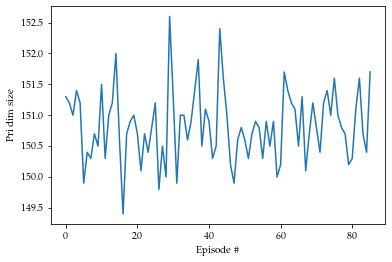

In [15]:
## Princip dim data analysis
pri_per_ep = np.zeros(num_ep)
for i in range(num_ep):
    pri_dim_ep = pickle.load(open(name_dir+f'pri_dim_{i}.p', 'rb'))
    pri_per_ep[i] = np.mean([max(pri_traj) for pri_traj in pri_dim_ep])
    
## Max and min
index_max = np.argmax(pri_per_ep)
index_min = np.argmin(pri_per_ep)

print(f'The biggest pri dim (BEST CASE) is at episode {index_min} and is equal to {pri_per_ep[index_min]}')
print(pickle.load(open(name_dir+f'pri_dim_{index_max}.p', 'rb')))
print(f'The smallest pri dim (WORST CASE) is at episode {index_max} and is equal to {pri_per_ep[index_max]}')
print(pickle.load(open(name_dir+f'pri_dim_{index_min}.p', 'rb')))

## Plot energies over episode    
plt.plot(np.arange(len(pri_per_ep)), pri_per_ep)
plt.ylabel('Pri dim size')
plt.xlabel('Episode \#')

In [ ]:
## Rewards of episode with max score
file_rew_max = name_dir+f'rew_{index_max}.p'
rew_max = pickle.load(open(file_rew_max, 'rb'))
print(rew_max)
rew_of_each_trajs = [np.sum(ep_rews) for ep_rews in rew_max]
plt.plot(np.arange(len(rew_max)), rew_of_each_trajs)
plt.ylabel('Reward')
plt.xlabel('# Traj')

print('This episode collected a score of = ', np.mean(rew_of_each_trajs))

In [ ]:
## Plot energies of episode with max score
file_en_max = name_dir+f'en_{index_max}.p'
en_max = pickle.load(open(file_en_max, 'rb'))
print(en_max)
plt.plot(np.arange(len(en_max)), [en_max[i,-1] for i in range(len(en_max))])
plt.ylabel('Last Energy')
plt.xlabel('# Traj')

print('The last energy of the episode with max score is = ', en_max[-1,-1])

In [ ]:
## Plot princip dim of episode with max score
file_pri_max = name_dir+f'pri_dim_{index_max}.p'
pri_max = pickle.load(open(file_pri_max, 'rb'))
print(pri_max)
plt.plot(np.arange(len(pri_max)), [np.mean(pri_max[i]) for i in range (len(pri_max))])
plt.ylabel('Pri dims')
plt.xlabel('# Traj')

print('The mean over trajs of last prin dim of the episode with max score is = ', np.mean(pri_max[-1]))

In [ ]:
## Plot full dim of episode with max score
file_full_max = name_dir+f'full_dim_{index_max}.p'
full_max = pickle.load(open(file_full_max, 'rb'))
print(full_max)
plt.plot(np.arange(len(full_max)), [np.mean(full_max[i]) for i in range (len(full_max))])
plt.ylabel('Full dims')
plt.xlabel('# Traj')

print('The mean over trajs of last full dim of the episode with max score is = ', np.mean(full_max[-1]))

tensor([[ 21.7787,   4.4686,   3.4330],
        [ 60.8901,  14.6762,  21.1219],
        [ 87.7352,  32.8716,  29.6871],
        [ 40.5775,  24.1592,  41.8669],
        [ 34.0867,  37.1250,  32.5508],
        [ 88.1046,  63.2947,  89.0888],
        [106.4596,  35.0258,  67.7972],
        [ 45.1607,  79.8939, 104.0366],
        [ 59.6900, 109.6736, 108.5495],
        [ 41.4431,  97.6526,  54.4285],
        [ 73.3718,  27.2549,  93.8546],
        [ 73.2509,  66.4393,   1.0000],
        [ 71.0714, 102.5269,  44.1040],
        [102.7186,  64.9480, 110.0000],
        [ 57.9209,  55.8233,  40.5947],
        [ 85.8861, 110.0000,  42.3755],
        [  5.3913,  87.0811,  70.9800],
        [110.0000,  23.9869,  53.7153],
        [ 79.2492,  90.0255,   1.0000],
        [ 48.5942,  71.3177,  32.9514],
        [ 16.2651,  43.7088,  61.7871],
        [ 89.5327,  20.9127,  18.4157],
        [ 83.6050,   1.0000,  72.9907],
        [ 67.3076,  82.0990, 107.7790],
        [ 53.3961,  65.2431,  89.7952],


(array([ 8., 25., 18., 24., 19., 21., 30., 19., 14.,  9.,  7.,  5.,  0.,
         0.,  1.]),
 array([3.0000000e+00, 2.2907085e+03, 4.5784170e+03, 6.8661260e+03,
        9.1538340e+03, 1.1441543e+04, 1.3729252e+04, 1.6016960e+04,
        1.8304668e+04, 2.0592377e+04, 2.2880086e+04, 2.5167795e+04,
        2.7455504e+04, 2.9743211e+04, 3.2030920e+04, 3.4318629e+04],
       dtype=float32),
 <BarContainer object of 15 artists>)

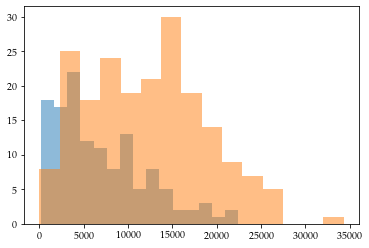

In [17]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with max score)
sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_max = name_dir+f'sigmas_{index_max}.p'
sigmas_rl = pickle.load(open(file_sigmas_max, 'rb'))
sigmas_rl = sigmas_rl*109/2 + 111/2
sigmas_rl_last = sigmas_rl[-1,-1]
print(sigmas_rl_last)
sigmas_rl_squared = sigmas_rl_last[:,0]**2 + sigmas_rl_last[:,1]**2 + sigmas_rl_last[:,2]**2
sigmas_rl_squared = sigmas_rl_squared.detach().numpy()
plt.hist(sigmas_random_squared, bins=15, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=15, alpha=0.5)

In [ ]:
## Rewards of episode with min score
file_rew_min = name_dir+f'rew_{index_min}.p'
rew_min = pickle.load(open(file_rew_min, 'rb'))
print(rew_min)
rew_of_each_trajs = [np.sum(ep_rews) for ep_rews in rew_min]
plt.plot(np.arange(len(rew_min)), rew_of_each_trajs)
plt.ylabel('Reward')
plt.xlabel('# Traj')
print('This episode collected a score of = ', np.mean(rew_of_each_trajs))

In [ ]:
## Plot energies of episode with min score
file_en_min = name_dir+f'en_{index_min}.p'
en_min = pickle.load(open(file_en_min, 'rb'))
print(en_min)
plt.plot(np.arange(len(en_min)), [en_min[i,-1] for i in range(len(en_min))])
plt.ylabel('Energy')
plt.xlabel('# Traj')

print('The last energy of the episode with max score is = ', en_min[-1,-1])

In [ ]:
## Plot princip dim of episode with minx score
file_pri_min = name_dir+f'pri_dim_{index_min}.p'
pri_min = pickle.load(open(file_pri_min, 'rb'))
print(pri_min)
plt.plot(np.arange(len(pri_min)), [np.mean(pri_min[i]) for i in range (len(pri_min))])
plt.ylabel('Pri dims')
plt.xlabel('# Traj')

print('The mean over trajs of last prin dim of the episode with max score is = ', np.mean(pri_min[-1]))

In [ ]:
## Plot full dim of episode with min score
file_full_min = name_dir+f'full_dim_{index_min}.p'
full_min = pickle.load(open(file_full_min, 'rb'))
print(full_min)
plt.plot(np.arange(len(full_min)), [np.mean(full_min[i]) for i in range (len(full_min))])
plt.ylabel('Full dims')
plt.xlabel('# Traj')

print('The mean over trajs of last full dim of the episode with max score is = ', np.mean(full_min[-1]))

tensor([[ 29.0178,  90.8429,  32.6634],
        [ 21.0832,  97.0347, 104.5294],
        [ 78.6570,  50.7360,  40.5142],
        [ 43.6515,  88.1607,  61.2868],
        [ 58.8421,  71.6167,  77.8852],
        [ 44.2224,  38.2770,  74.2198],
        [ 29.5387,  60.4710,  76.1594],
        [ 75.4247,  48.1664,   5.0217],
        [ 85.3711,  73.5164,  58.6232],
        [ 22.2551,   1.0000,  51.3676],
        [ 18.2830, 110.0000,   6.5243],
        [ 66.6111,  48.2104,   6.3100],
        [ 30.2826, 110.0000,   1.0000],
        [ 20.1083,  76.3331, 110.0000],
        [ 38.0888, 110.0000,  66.8368],
        [110.0000,   1.0000,  13.2116],
        [  1.0000,  47.0486,  52.9411],
        [ 28.9678,  51.7580,  95.9916],
        [ 63.8342,  22.3659,  22.6422],
        [ 86.2563,  20.9009,  45.2357],
        [ 42.4001,  99.4612,  79.6201],
        [ 86.0706,  58.7201, 105.0677],
        [ 35.8748,  35.8509,  53.8658],
        [ 25.1428,  40.0346,   1.0000],
        [ 17.9080,  77.7911,  49.9123],


(array([13., 20., 23., 22., 19., 26., 24., 12., 20.,  7.,  7.,  3.,  3.,
         0.,  1.]),
 array([ 1162.7876,  3183.4028,  5204.018 ,  7224.634 ,  9245.249 ,
        11265.864 , 13286.4795, 15307.095 , 17327.71  , 19348.326 ,
        21368.941 , 23389.557 , 25410.172 , 27430.787 , 29451.402 ,
        31472.018 ], dtype=float32),
 <BarContainer object of 15 artists>)

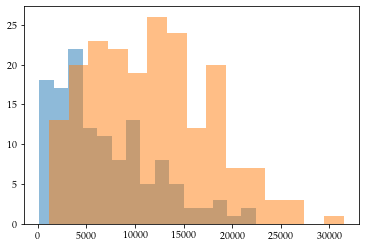

In [16]:
## Sigmas analysis (comparing with random and the one collected in the epsidoe with min score)
sigmas_random = np.loadtxt('sigmas_random.out')
sigmas_random_squared = sigmas_random[:,0]**2 + sigmas_random[:,1]**2 + sigmas_random[:,2]**2

file_sigmas_min = name_dir+f'sigmas_{index_min}.p'
sigmas_rl = pickle.load(open(file_sigmas_min, 'rb'))
sigmas_rl = sigmas_rl*109/2 + 111/2
sigmas_rl_last = sigmas_rl[-1,-1]
print(sigmas_rl_last)
sigmas_rl_squared = sigmas_rl_last[:,0]**2 + sigmas_rl_last[:,1]**2 + sigmas_rl_last[:,2]**2
sigmas_rl_squared = sigmas_rl_squared.detach().numpy()
plt.hist(sigmas_random_squared, bins=15, alpha=0.5)
plt.hist(sigmas_rl_squared, bins=15, alpha=0.5)